In [694]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [695]:
df = pd.read_csv('sample_data/Month_Value_1.csv')

In [696]:
df

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...,...
91,01.08.2022,NaN,NaN,NaN,NaN
92,01.09.2022,NaN,NaN,NaN,NaN
93,01.10.2022,NaN,NaN,NaN,NaN
94,01.11.2022,NaN,NaN,NaN,NaN


In [697]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    96 non-null     object 
 1   Revenue                                   64 non-null     float64
 2   Sales_quantity                            64 non-null     float64
 3   Average_cost                              64 non-null     float64
 4   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [698]:
df.describe()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
count,6.400000e+01,64.000000,64.000000,6.400000e+01
mean,3.236045e+07,19197.375000,1695.061159,2.869083e+07
std,1.164150e+07,6591.287257,296.844793,1.057191e+06
min,1.402148e+07,8314.000000,1110.576805,2.740647e+07
25%,2.242655e+07,15065.500000,1499.142841,2.782857e+07
50%,3.209088e+07,18368.000000,1654.399798,2.819785e+07
75%,3.992999e+07,22856.250000,1916.401096,2.987852e+07
max,5.875647e+07,38069.000000,2559.328184,3.002468e+07


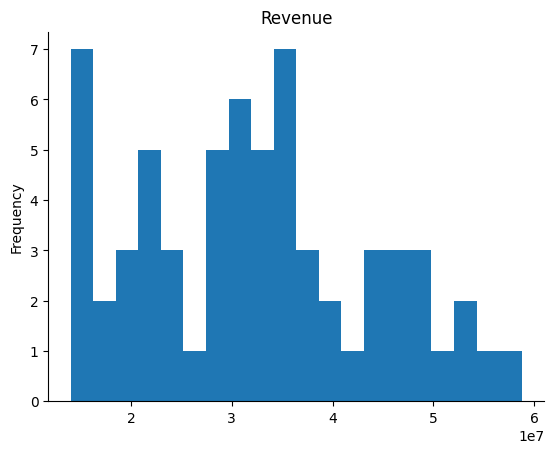

In [699]:
df['Revenue'].plot(kind='hist', bins=20, title='Revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [700]:
df.shape

(96, 5)

In [701]:
df['Period'] = pd.to_datetime(df['Period'])

In [702]:
df.isnull().sum()

Period                                       0
Revenue                                     32
Sales_quantity                              32
Average_cost                                32
The_average_annual_payroll_of_the_region    32
dtype: int64

In [703]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5, add_indicator=True)
df_transformed = pd.DataFrame(knn.fit_transform(df.drop(columns = ['Period'])))

In [704]:
df_transformed

,0,1,2,3,4,5,6,7
0,1.601007e+07,12729.000,1257.763541,3.002468e+07,0.0,0.0,0.0,0.0
1,1.580759e+07,11636.000,1358.507000,3.002468e+07,0.0,0.0,0.0,0.0
2,2.204715e+07,15922.000,1384.697024,3.002468e+07,0.0,0.0,0.0,0.0
3,1.881458e+07,15227.000,1235.606705,3.002468e+07,0.0,0.0,0.0,0.0
4,1.402148e+07,8620.000,1626.621765,3.002468e+07,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
91,3.236045e+07,19197.375,1695.061159,2.869083e+07,1.0,1.0,1.0,1.0
92,3.236045e+07,19197.375,1695.061159,2.869083e+07,1.0,1.0,1.0,1.0
93,3.236045e+07,19197.375,1695.061159,2.869083e+07,1.0,1.0,1.0,1.0
94,3.236045e+07,19197.375,1695.061159,2.869083e+07,1.0,1.0,1.0,1.0


In [705]:
df.isnull().sum()

Period                                       0
Revenue                                     32
Sales_quantity                              32
Average_cost                                32
The_average_annual_payroll_of_the_region    32
dtype: int64

In [706]:
df['Revenue'] = df_transformed[0]
df['Sales_quantity'] = df_transformed[1]
df['Average_cost'] = df_transformed[2]
df['The_average_annual_payroll_of_the_region'] = df_transformed[3]

In [707]:
df

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,2015-01-01,1.601007e+07,12729.000,1257.763541,3.002468e+07
1,2015-01-02,1.580759e+07,11636.000,1358.507000,3.002468e+07
2,2015-01-03,2.204715e+07,15922.000,1384.697024,3.002468e+07
3,2015-01-04,1.881458e+07,15227.000,1235.606705,3.002468e+07
4,2015-01-05,1.402148e+07,8620.000,1626.621765,3.002468e+07
...,...,...,...,...,...
91,2022-01-08,3.236045e+07,19197.375,1695.061159,2.869083e+07
92,2022-01-09,3.236045e+07,19197.375,1695.061159,2.869083e+07
93,2022-01-10,3.236045e+07,19197.375,1695.061159,2.869083e+07
94,2022-01-11,3.236045e+07,19197.375,1695.061159,2.869083e+07


In [708]:
df.isnull().sum()

Period                                      0
Revenue                                     0
Sales_quantity                              0
Average_cost                                0
The_average_annual_payroll_of_the_region    0
dtype: int64

In [709]:
df.columns[1:len(df.columns)]

Index(['Revenue', 'Sales_quantity', 'Average_cost',
       'The_average_annual_payroll_of_the_region'],
      dtype='object')

In [710]:
df.dtypes

Period                                      datetime64[ns]
Revenue                                            float64
Sales_quantity                                     float64
Average_cost                                       float64
The_average_annual_payroll_of_the_region           float64
dtype: object

## Let's get rid of the outliers (in this case we will turn them into NAs)

In [711]:
def remove_outliers(df):



    def remove_outliers_columns(column):

      med = np.median(column)
      q75, q25 = np.percentile(column, [75 ,25])
      iqr = q75 - q25
      upper_bound = (1.5 * iqr) + q75
      lower_bound = (1.5 * iqr) - q25

      # Initialize a list to store new column values
      new_column = []

        # Iterate through values in the column
      for value in column:
            # Check if the value is an outlier
          if (value < lower_bound) or (value > upper_bound):
                # If it's an outlier, append np.nan
              new_column.append(np.nan)
          else:
                # If it's not an outlier, append the original value
              new_column.append(value)

      return(new_column)


    for i in df.columns[1:len(df.columns)]:
      df[i] = remove_outliers_columns(df[i])

    return(df)

In [712]:
remove_outliers(df)

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,2015-01-01,1.601007e+07,12729.000,1257.763541,3.002468e+07
1,2015-01-02,1.580759e+07,11636.000,1358.507000,3.002468e+07
2,2015-01-03,2.204715e+07,15922.000,1384.697024,3.002468e+07
3,2015-01-04,1.881458e+07,15227.000,1235.606705,3.002468e+07
4,2015-01-05,1.402148e+07,8620.000,1626.621765,3.002468e+07
...,...,...,...,...,...
91,2022-01-08,3.236045e+07,19197.375,1695.061159,2.869083e+07
92,2022-01-09,3.236045e+07,19197.375,1695.061159,2.869083e+07
93,2022-01-10,3.236045e+07,19197.375,1695.061159,2.869083e+07
94,2022-01-11,3.236045e+07,19197.375,1695.061159,2.869083e+07


In [713]:
df.isnull().sum()

Period                                       0
Revenue                                     10
Sales_quantity                              10
Average_cost                                10
The_average_annual_payroll_of_the_region     0
dtype: int64

## Now let's go back and impute those outliers

In [714]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5, add_indicator=True)
df_transformed = pd.DataFrame(knn.fit_transform(df.drop(columns = ['Period'])))

In [715]:
df['Revenue'] = df_transformed[0]
df['Sales_quantity'] = df_transformed[1]
df['Average_cost'] = df_transformed[2]
df['The_average_annual_payroll_of_the_region'] = df_transformed[3]

In [716]:
df.isnull().sum()

Period                                      0
Revenue                                     0
Sales_quantity                              0
Average_cost                                0
The_average_annual_payroll_of_the_region    0
dtype: int64

In [717]:
df.corr()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,1.000000,0.524611,0.475094,0.421274,0.027278
Revenue,0.524611,1.000000,0.838516,0.321548,-0.106420
Sales_quantity,0.475094,0.838516,1.000000,-0.017626,0.066528
Average_cost,0.421274,0.321548,-0.017626,1.000000,-0.368434
The_average_annual_payroll_of_the_region,0.027278,-0.106420,0.066528,-0.368434,1.000000


## We can see a high positive correlation between Sales_quantity and Revenue. This makes sense; the more you sell, the more revenue you earn.

## Now let's get our data ready for XGBOOST

In [718]:
df = df.set_index('Period')
df.index = pd.to_datetime(df.index)

In [719]:
train = df.loc[df.index < pd.to_datetime('01-01-2021')]
test = df.loc[df.index >= pd.to_datetime('01-01-2021')]

In [720]:
train.count()

Revenue                                     72
Sales_quantity                              72
Average_cost                                72
The_average_annual_payroll_of_the_region    72
dtype: int64

In [721]:
test.count()

Revenue                                     24
Sales_quantity                              24
Average_cost                                24
The_average_annual_payroll_of_the_region    24
dtype: int64

In [722]:
from sklearn.preprocessing import StandardScaler as SS
ss = SS()

X_train = ss.fit_transform(train.drop(columns = 'Revenue'))
y_train = train['Revenue']
X_test = ss.transform(test.drop(columns = 'Revenue'))
y_test = test['Revenue']

## Initializing and performing the XGBOOST

In [723]:
import xgboost as XGB
reg = XGB.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50)
reg.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)], verbose=True)

[0]	validation_0-rmse:6268394.24815	validation_1-rmse:1482464.01623
[1]	validation_0-rmse:4867317.45632	validation_1-rmse:825333.99498
[2]	validation_0-rmse:3808872.90162	validation_1-rmse:604411.98813
[3]	validation_0-rmse:3018601.62146	validation_1-rmse:442565.99273
[4]	validation_0-rmse:2415567.56005	validation_1-rmse:354238.00541
[5]	validation_0-rmse:1925788.11575	validation_1-rmse:259940.00046
[6]	validation_0-rmse:1584924.02668	validation_1-rmse:193224.00248
[7]	validation_0-rmse:1309583.02895	validation_1-rmse:134225.99784
[8]	validation_0-rmse:1105740.02964	validation_1-rmse:91318.00085
[9]	validation_0-rmse:942960.36007	validation_1-rmse:68453.99880
[10]	validation_0-rmse:799172.82392	validation_1-rmse:8324.00000
[11]	validation_0-rmse:668823.41973	validation_1-rmse:6104.00000
[12]	validation_0-rmse:561830.78459	validation_1-rmse:4476.00000
[13]	validation_0-rmse:476582.83077	validation_1-rmse:3282.00000
[14]	validation_0-rmse:405657.55574	validation_1-rmse:11252.00000
[15]	v

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [724]:
reg.feature_importances_

array([0.63838416, 0.15398051, 0.20763533], dtype=float32)

## As expected, the sales quantity has the highest importance in this model that predicts revenue.

## Let's plot these predictions

<ipython-input-725-24bc55265a8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


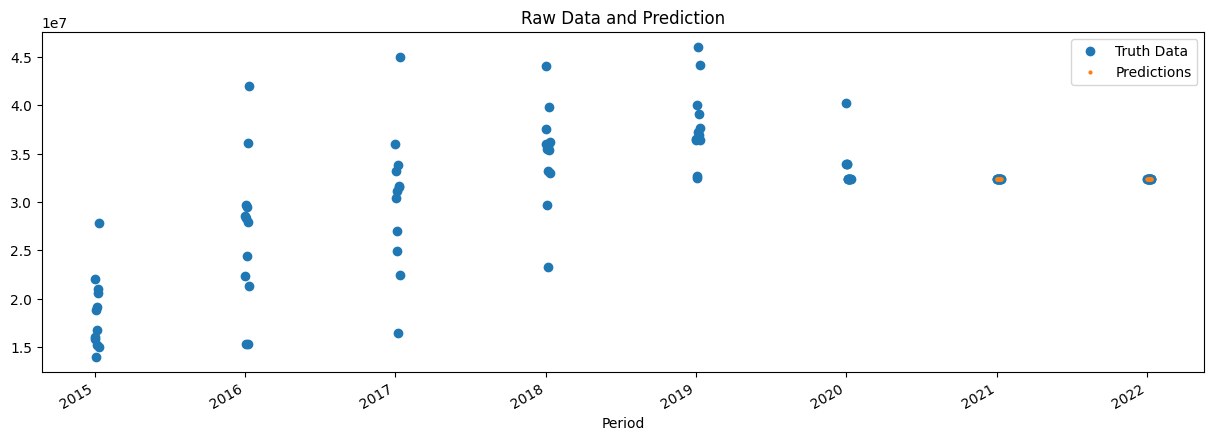

In [725]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['Revenue']].plot(figsize=(15, 5), style='o')
df['prediction'].plot(ax=ax, style='o', markersize=2)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

## The predictions are right on target, but because we used KNN imputer for much of the data, our results are a bit weird as you can see.

In [726]:
prediction = pd.DataFrame(reg.predict(X_train), columns=['prediction'])
prediction.head()

,prediction
0,16010201.0
1,15806790.0
2,22046884.0
3,18813970.0
4,14021835.0


In [727]:
missing_values_indices = df[df['prediction'].isna()].index

# Replace missing values with values from prediction
df.loc[missing_values_indices, 'prediction'] = prediction.iloc[:len(missing_values_indices), 0].values

In [728]:
df.head()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region,prediction
Period,,,,,
2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0,16010201.0
2015-01-02,1.580759e+07,11636.0,1358.507000,30024676.0,15806790.0
2015-01-03,2.204715e+07,15922.0,1384.697024,30024676.0,22046884.0
2015-01-04,1.881458e+07,15227.0,1235.606705,30024676.0,18813970.0
2015-01-05,1.402148e+07,8620.0,1626.621765,30024676.0,14021835.0


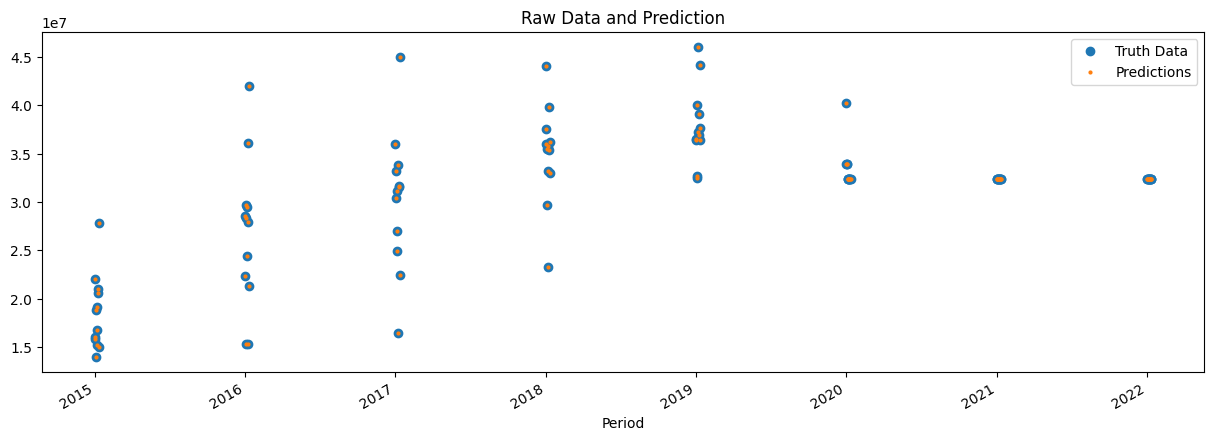

In [729]:
ax = df[['Revenue']].plot(figsize=(15, 5), style='o')
df['prediction'].plot(ax=ax, style='o', markersize=2)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

## The model does a great job, but keep in mind this data originally had so much missing data and many outliers that were all imputed, so it is hard to tell if this is a job well done.

## Let's determine the Root Mean Squared Error to evaluate how close the model's predictions were, by creating a simple function.

In [730]:
def do_RMSE(true, prediction):

  import numpy as np

  n = len(prediction)
  y = true
  yhat = prediction

  MSE = (np.sum((y - yhat) ** 2)) / n
  RMSE = np.sqrt(MSE)

  return(RMSE)

In [731]:
y_pred1 = reg.predict(X_train)
do_RMSE(y_train, y_pred1)

419.47414296635316

In [732]:
y_pred2 = reg.predict(X_test)
do_RMSE(y_test, y_pred2)

0.2594257481396198

## The model's predictions are off by about \$419 on average for the training data, and for the testing data, the model's predictions are off by about \$0.26 on average. However, this model may have its flaws as not only were many missing values imputed, but many outliers were also imputed. This is the reason why the model is so easily able to predict the values for the data.